In [1]:
# Importa la biblioteca pandas con el alias pd, que se usa para manipulación de datos en estructuras tipo DataFrame.
import pandas as pd

# Importa la biblioteca numpy con el alias np, que se usa para operaciones numéricas avanzadas (aunque en este fragmento no se utiliza).
import numpy as np

import matplotlib.pyplot as plt
# Lee el archivo 'grd_2023.csv' usando como delimitador el símbolo '|' y lo guarda en un DataFrame llamado grd.
grd = pd.read_csv('grd_2023.csv', delimiter='|')

# Muestra las primeras 5 filas del DataFrame grd para una vista preliminar de los datos.
grd.head()

# Lee el archivo 'hospitales.csv', sin encabezado (header=None), y con '|' como delimitador. Guarda el resultado en un DataFrame llamado hospitales.
hospitales = pd.read_csv('hospitales.csv', header=None, delimiter="|")

# Muestra las primeras 5 filas del DataFrame hospitales.
hospitales.head()

# Lee el archivo 'ir-GRD.csv', sin encabezado (header=None), usando '|' como delimitador, y lo guarda en el DataFrame ir.
ir = pd.read_csv('ir-GRD.csv', delimiter='|', header = None)

# Muestra el contenido completo del DataFrame ir.
ir
# Realiza una combinación (merge) entre los DataFrames grd y hospitales. 
# Se usa 'COD_HOSPITAL' de grd y la columna 0 de hospitales para hacer la combinación (join).
# Se utiliza 'how="left"' para hacer una combinación a la izquierda, lo que significa que todos los registros de grd estarán en el resultado.
grd_h = pd.merge(grd, hospitales, left_on='COD_HOSPITAL', right_on=0, how='left')

# Elimina la columna 0 del DataFrame resultante, que es la que se utilizó para la combinación y que ya no es necesaria.
grd_h = grd_h.drop(columns=0)

# Renombra la columna 1 del DataFrame resultante a 'NOMBRE_HOSPITAL' para que tenga un nombre más descriptivo.
grd_h = grd_h.rename(columns={1: 'NOMBRE_HOSPITAL'})

# Renombra la columna 'FECHAALTA' a 'FECHA_ALTA' para estandarizar el nombre de la columna.
grd_h = grd_h.rename(columns={"FECHAALTA": 'FECHA_ALTA'})

# Renombra la columna 'TIPOALTA' a 'TIPO_ALTA' para estandarizar el nombre de la columna.
grd_h = grd_h.rename(columns={"TIPOALTA": 'TIPO_ALTA'})

# Muestra las primeras 5 filas del DataFrame grd_h para revisar el resultado de las transformaciones.
grd_h.head()


,COD_HOSPITAL,CIP_ENCRIPTADO,SEXO,FECHA_NACIMIENTO,SERVICIO_SALUD,TIPO_INGRESO,FECHA_INGRESO,FECHA_ALTA,TIPO_ALTA,DIAGNOSTICO1,IR_29301_COD_GRD,IR_29301_PESO,IR_29301_SEVERIDAD,IR_29301_MORTALIDAD,EDAD,DIAS_ESTANCIA,NOMBRE_HOSPITAL
0,122100,72196813.0,HOMBRE,1980-04-13,VALDIVIA,URGENCIA,2023-03-12,2023-03-14,DOMICILIO,K35.3,64161.0,0.7094,1.0,1.0,43.0,2,Hospital Clínico Regional (Valdivia)
1,114101,NaN,HOMBRE,2001-11-04,METROPOLITANO SURORIENTE,URGENCIA,2023-11-04,2023-11-10,DOMICILIO,J93.1,41301.0,1.0869,1.0,1.0,22.0,6,Complejo Hospitalario Dr. Sótero del Río (San...
2,114101,97627974.0,HOMBRE,2020-07-30,METROPOLITANO SURORIENTE,URGENCIA,2023-06-07,2023-06-08,HOSPITALIZACIÓN DOMICILIARIA,J12.1,44161.0,0.4084,1.0,1.0,3.0,1,Complejo Hospitalario Dr. Sótero del Río (San...
3,106103,67770674.0,MUJER,1978-11-14,VALPARAISO SAN ANTONIO,PROGRAMADA,2023-05-25,2023-05-26,DOMICILIO,N39.3,131301.0,0.6406,1.0,1.0,45.0,1,Hospital Claudio Vicuña (San Antonio)
4,106103,100390800.0,MUJER,2023-12-20,VALPARAISO SAN ANTONIO,URGENCIA,2023-12-28,2023-12-30,DOMICILIO,R17,74131.0,0.5346,1.0,1.0,0.0,2,Hospital Claudio Vicuña (San Antonio)


In [2]:
grd_h["TIPO_INGRESO"].unique()


array(['URGENCIA', 'PROGRAMADA', 'OBSTETRICA', nan], dtype=object)

In [3]:
# Realiza una combinación (merge) entre los DataFrames grd_h y ir. 
# Se utiliza 'IR_29301_COD_GRD' de grd_h y la columna 0 de ir para hacer la combinación (join).
# Se utiliza 'how="left"' para hacer una combinación a la izquierda, asegurando que todos los registros de grd_h estén en el resultado.
# Después, se elimina la columna 0 de ir (que se utilizó para la combinación) y se renombra la columna 1 de ir a 'NOMBRE_IR'.
grd_f = pd.merge(grd_h, ir, left_on='IR_29301_COD_GRD', right_on=0, how='left').drop(columns=0).rename(columns={1: 'NOMBRE_IR'})

# Selecciona un subconjunto de columnas del DataFrame grd_f, asegurando que solo se mantendrán las columnas especificadas en la lista.
# Esto reordena las columnas y se asegura de que solo estén las necesarias para el análisis.
grd_f = grd_f[["NOMBRE_HOSPITAL", "SEXO", "FECHA_NACIMIENTO", 
               "TIPO_INGRESO", "TIPO_ALTA",
               "IR_29301_SEVERIDAD",
               "IR_29301_MORTALIDAD", "EDAD","DIAS_ESTANCIA"]]

# Muestra el DataFrame resultante grd_f, que ahora contiene solo las columnas seleccionadas.
grd_f

,NOMBRE_HOSPITAL,SEXO,FECHA_NACIMIENTO,TIPO_INGRESO,TIPO_ALTA,IR_29301_SEVERIDAD,IR_29301_MORTALIDAD,EDAD,DIAS_ESTANCIA
0,Hospital Clínico Regional (Valdivia),HOMBRE,1980-04-13,URGENCIA,DOMICILIO,1.0,1.0,43.0,2
1,Complejo Hospitalario Dr. Sótero del Río (San...,HOMBRE,2001-11-04,URGENCIA,DOMICILIO,1.0,1.0,22.0,6
2,Complejo Hospitalario Dr. Sótero del Río (San...,HOMBRE,2020-07-30,URGENCIA,HOSPITALIZACIÓN DOMICILIARIA,1.0,1.0,3.0,1
3,Hospital Claudio Vicuña (San Antonio),MUJER,1978-11-14,PROGRAMADA,DOMICILIO,1.0,1.0,45.0,1
4,Hospital Claudio Vicuña (San Antonio),MUJER,2023-12-20,URGENCIA,DOMICILIO,1.0,1.0,0.0,2
...,...,...,...,...,...,...,...,...,...
1039582,Hospital Dr. Antonio Tirado Lanas (Ovalle),MUJER,1995-12-06,OBSTETRICA,DOMICILIO,1.0,1.0,27.0,3
1039583,Hospital Clínico Regional Dr. Guillermo Grant...,MUJER,1991-04-26,PROGRAMADA,DOMICILIO,0.0,0.0,32.0,0
1039584,Hospital Regional de Rancagua,HOMBRE,2015-01-08,URGENCIA,DOMICILIO,1.0,1.0,9.0,2
1039585,Hospital Base San José de Osorno,HOMBRE,2014-01-07,PROGRAMADA,DOMICILIO,1.0,1.0,9.0,0


In [4]:
# Remove rows with null values
grd_f = grd_f.dropna()

# Optionally, reset the index after dropping rows
grd_f = grd_f.reset_index(drop=True)

In [5]:
grd_f["TIPO_INGRESO"] = np.where(grd_f["TIPO_INGRESO"] == "URGENCIA", 1, 0)

In [6]:
(grd_f["TIPO_INGRESO"].sum())/(grd_f.shape[0])

0.4988854714931796

Casi la mitad de todos los ingresos del dataset son por urgencias, lo cual podria ser un dato importante mas adelante.

In [7]:
grd_f["TIPO_ALTA"].unique()

array(['DOMICILIO', 'HOSPITALIZACIÓN DOMICILIARIA',
       'DERIVACIÓN INST. PRIVADA (COMPRA DE SERVICIOS',
       'DERIVACIÓN OTRO HOSPITAL DEL SERVICIO', 'FUGA DEL PACIENTE',
       'DERIVACIÓN OTRO HOSPITAL DE LA RED NACIONAL', 'ALTA VOLUNTARIA',
       'FALLECIDO', 'DERIVACIÓN A OTROS CENTROS (CÁRCEL, HOGAR DE',
       'DERIVACIÓN INST. PRIVADA (VOLUNTARIO)'], dtype=object)

In [8]:
grd_f["TIPO_ALTA"] = np.where(grd_f["TIPO_ALTA"] == "FALLECIDO", 1, 0)

In [9]:
(grd_f["TIPO_ALTA"].sum())/(grd_f.shape[0])

0.02416559478879757

Solo el 2% de los pacientes han fallecido, ahora revisaremos la variacion de esto segun su indice de mortalidad

In [10]:
# Group by 'IR_29301_MORTALIDAD' and calculate the sum and count of 'TIPO_ALTA'
grouped = grd_f.groupby("IR_29301_MORTALIDAD")["TIPO_ALTA"]

# Calculate the mean by dividing the sum by the count
result = grouped.sum() / grouped.count()

print(result)

IR_29301_MORTALIDAD
0.0    0.000031
1.0    0.001709
2.0    0.016002
3.0    0.127120
Name: TIPO_ALTA, dtype: float64


Se puede apreciar claramente que a mayor mortalidad otorgada al paciente, mayor es la tase de fallecimiento de este. ahora veremos si adicionalmente juega un papel el rango de edad de los pacientes

In [11]:
# Define the bins and labels for the age ranges
bins = [-0.1, 5, 11, 17, 26, 59, float('inf')]
labels = ['Primera infancia', 'Infancia', 'Adolescencia', 'Juventud', 'Adultez', 'Persona mayor']

# Create a new column with the age ranges
grd_f['AGE_GROUP'] = pd.cut(grd_f['EDAD'], bins=bins, labels=labels, right=True)

print(grd_f[['EDAD', 'AGE_GROUP']])

         EDAD         AGE_GROUP
0        43.0           Adultez
1        22.0          Juventud
2         3.0  Primera infancia
3        45.0           Adultez
4         0.0  Primera infancia
...       ...               ...
1039448  27.0           Adultez
1039449  32.0           Adultez
1039450   9.0          Infancia
1039451   9.0          Infancia
1039452  72.0     Persona mayor

[1039453 rows x 2 columns]


In [12]:
# Group by 'AGE_GROUP' and 'IR_29301_MORTALIDAD', then calculate the sum and count of 'TIPO_ALTA'
grouped = grd_f.groupby(["AGE_GROUP", "IR_29301_MORTALIDAD"])["TIPO_ALTA"]

# Calculate the mean by dividing the sum by the count
result = grouped.sum() / grouped.count()

print(result)

AGE_GROUP         IR_29301_MORTALIDAD
Primera infancia  0.0                    0.000155
                  1.0                    0.000895
                  2.0                    0.007126
                  3.0                    0.019652
Infancia          0.0                    0.000000
                  1.0                    0.000049
                  2.0                    0.001150
                  3.0                    0.012495
Adolescencia      0.0                    0.000000
                  1.0                    0.000038
                  2.0                    0.002736
                  3.0                    0.037333
Juventud          0.0                    0.000000
                  1.0                    0.000227
                  2.0                    0.003973
                  3.0                    0.068842
Adultez           0.0                    0.000041
                  1.0                    0.000704
                  2.0                    0.008011
            

/var/folders/hw/8tjnzmw52vbctc3wdkptw00r0000gn/T/ipykernel_13208/2059623976.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = grd_f.groupby(["AGE_GROUP", "IR_29301_MORTALIDAD"])["TIPO_ALTA"]


ahora revisaremos especificamente con mortalidad 3, donde se espera encontrar la mayor variabilidad

In [13]:
# Filter the DataFrame for rows where 'IR_29301_MORTALIDAD' equals 3
filtered_df = grd_f[grd_f["IR_29301_MORTALIDAD"] == 3]

# Group by 'AGE_GROUP' and calculate the sum and count of 'TIPO_ALTA'
grouped = filtered_df.groupby("AGE_GROUP")["TIPO_ALTA"]

# Calculate the mean by dividing the sum by the count
result = grouped.sum() / grouped.count()

print(result)

AGE_GROUP
Primera infancia    0.019652
Infancia            0.012495
Adolescencia        0.037333
Juventud            0.068842
Adultez             0.108323
Persona mayor       0.177786
Name: TIPO_ALTA, dtype: float64


/var/folders/hw/8tjnzmw52vbctc3wdkptw00r0000gn/T/ipykernel_13208/302623226.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = filtered_df.groupby("AGE_GROUP")["TIPO_ALTA"]


/var/folders/hw/8tjnzmw52vbctc3wdkptw00r0000gn/T/ipykernel_13208/3546692948.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = grd_f.groupby(["AGE_GROUP", "IR_29301_MORTALIDAD"])["TIPO_ALTA"]


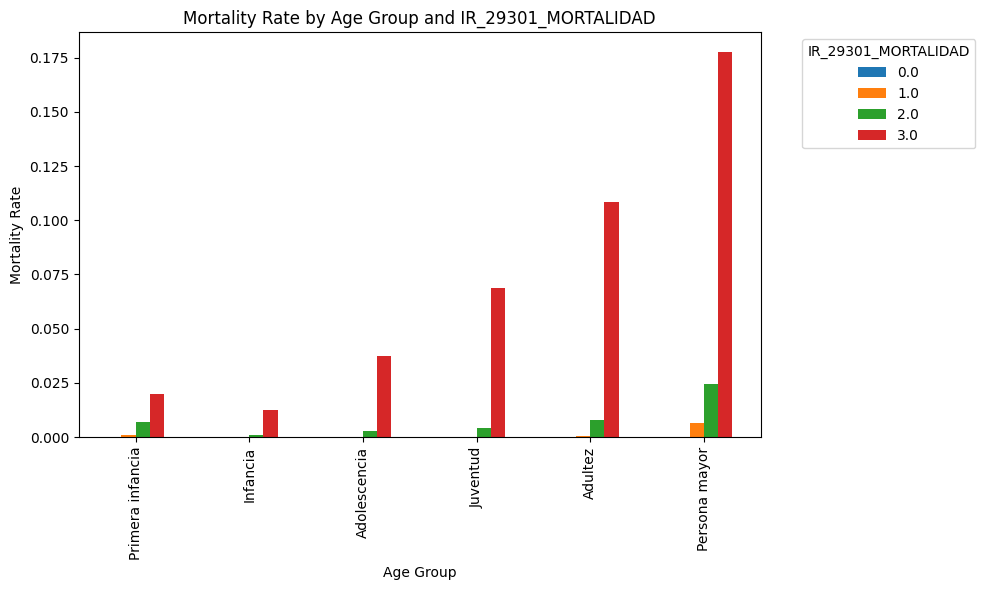

In [14]:
# Group by 'AGE_GROUP' and 'IR_29301_MORTALIDAD', then calculate the mean
grouped = grd_f.groupby(["AGE_GROUP", "IR_29301_MORTALIDAD"])["TIPO_ALTA"]
result = (grouped.sum() / grouped.count()).unstack()  # Unstack for better visualization

# Plot the result as a bar chart
result.plot(kind="bar", figsize=(10, 6))

# Add labels and title
plt.title("Mortality Rate by Age Group and IR_29301_MORTALIDAD")
plt.xlabel("Age Group")
plt.ylabel("Mortality Rate")
plt.legend(title="IR_29301_MORTALIDAD", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()

# Show the plot
plt.show()

In [15]:
# Filtra las filas de grd_f donde la columna 'TIPO_ALTA' es igual a "FALLECIDO", 
# lo que indica que la persona ha fallecido. El DataFrame resultante contiene solo a los fallecidos.
muertos = grd_f[grd_f["TIPO_ALTA"] == "FALLECIDO"]

# Filtra las filas de grd_f donde la columna 'FALLECIDO' es igual a 1, 
# lo que indica que la persona está registrada como fallecida. 
# El DataFrame resultante contiene solo las filas correspondientes a los fallecidos.
por_hosp = grd_f[grd_f["TIPO_ALTA"] == 1]

# Cuenta cuántos fallecidos hay en cada hospital según la columna 'NOMBRE_HOSPITAL' 
# en el DataFrame por_hosp. Devuelve un conteo de la cantidad de fallecidos por hospital.
m_por_hosp = por_hosp["NOMBRE_HOSPITAL"].value_counts()

# Cuenta cuántas personas hay registradas en cada hospital según la columna 'NOMBRE_HOSPITAL' 
# en el DataFrame grd_f. Devuelve un conteo total de personas por hospital.
a_por_hosp = grd_f["NOMBRE_HOSPITAL"].value_counts()

# Calcula la tasa de mortalidad por hospital dividiendo el número de fallecidos en cada hospital 
# (m_por_hosp) entre el número total de personas en ese hospital (a_por_hosp).
# El resultado es una serie que muestra la tasa de mortalidad por hospital.
tasa = m_por_hosp / a_por_hosp

# Ordena los valores de tasa en orden descendente para ver los hospitales con las tasas de mortalidad más altas.
# El parámetro 'inplace=True' modifica el DataFrame o serie original en lugar de crear uno nuevo.
tasa.sort_values(ascending=False, inplace=True)

# Imprime la serie tasa con las tasas de mortalidad por hospital ordenadas de mayor a menor.
tasa.head(10)

NOMBRE_HOSPITAL
Hospital de Urgencia Asistencia Pública Dr. Alejandro del Río            0.059886
Instituto Nacional de Enfermedades Respiratorias y Cirugía Torácica      0.043684
Hospital Clínico Metropolitano El Carmen Doctor Luis Valentín Ferrada    0.039683
Hospital Barros Luco Trudeau (Santiago, San Miguel)                      0.037790
Hospital Claudio Vicuña (San Antonio)                                    0.034376
Hospital Adalberto Steeger (Talagante)                                   0.033946
Hospital Dr. Leonardo Guzmán (Antofagasta)                               0.032976
Hospital Regional de Rancagua                                            0.031880
Hospital Dr. Félix Bulnes Cerda (Santiago, Quinta Normal)                0.031482
Hospital San Luis (Buin)                                                 0.031132
Name: count, dtype: float64

In [16]:
# Filter the DataFrame for the specific hospital
hospital_df = grd_f[grd_f["NOMBRE_HOSPITAL"] == " Hospital de Urgencia Asistencia Pública Dr. Alejandro del Río"]

# Filter rows where 'TIPO_ALTA' indicates "FALLECIDO"
muertos = hospital_df[hospital_df["TIPO_ALTA"] == 1]

# Count the number of deceased patients in the hospital
m_por_hosp = muertos.shape[0]

# Count the total number of patients in the hospital
a_por_hosp = hospital_df.shape[0]

# Calculate the mortality rate for the hospital
tasa = m_por_hosp / a_por_hosp

print(f"Mortality rate for 'Hospital de Urgencia Asistencia Pública Dr. Alejandro del Río': {tasa}")

Mortality rate for 'Hospital de Urgencia Asistencia Pública Dr. Alejandro del Río': 0.0598861007296672


Revisamos los datos del nuevo df hospital_df

In [17]:
hospital_df["AGE_GROUP"].value_counts()

AGE_GROUP
Persona mayor       5097
Adultez             5080
Juventud             906
Adolescencia         153
Primera infancia       1
Infancia               1
Name: count, dtype: int64

al ver que solo se presenta un paciente en los rangos etarios Primera infancia e Infancia, es mejor eliminarlos del grafico, debido a que afectaran el analisis como outliers

In [18]:
# Remove rows where AGE_GROUP is 'Primera infancia' or 'Infancia'
hospital_df = hospital_df[~hospital_df["AGE_GROUP"].isin(["Primera infancia", "Infancia"])]
hospital_df["AGE_GROUP"].value_counts()

AGE_GROUP
Persona mayor       5097
Adultez             5080
Juventud             906
Adolescencia         153
Primera infancia       0
Infancia               0
Name: count, dtype: int64

/var/folders/hw/8tjnzmw52vbctc3wdkptw00r0000gn/T/ipykernel_13208/2366818871.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = hospital_df.groupby(["AGE_GROUP", "IR_29301_MORTALIDAD"])["TIPO_ALTA"]


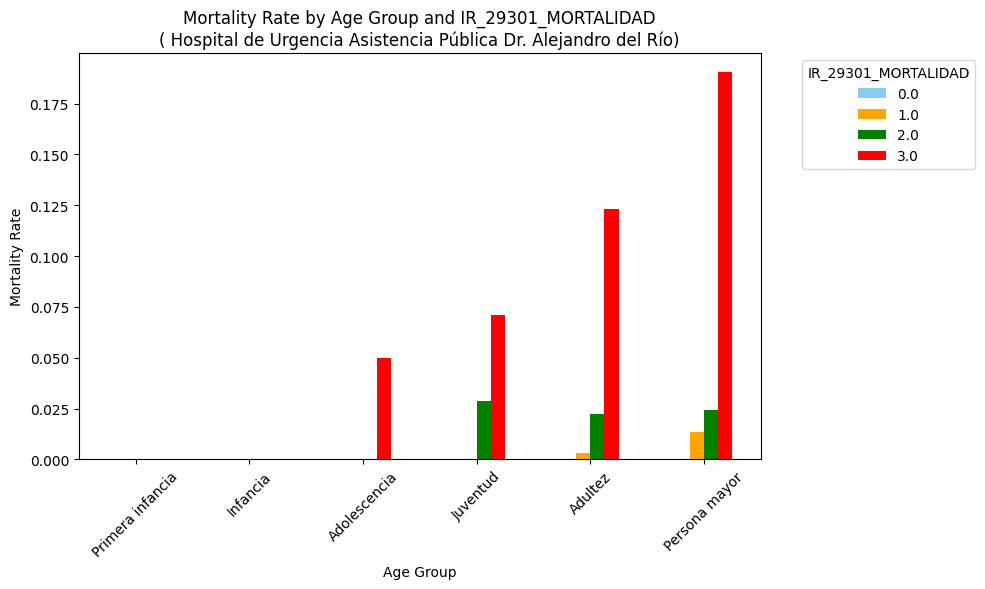

In [19]:

# Group by 'AGE_GROUP' and 'IR_29301_MORTALIDAD', then calculate the mean
grouped = hospital_df.groupby(["AGE_GROUP", "IR_29301_MORTALIDAD"])["TIPO_ALTA"]
result = (grouped.sum() / grouped.count()).unstack()  # Unstack for better visualization

# Plot the result as a bar chart
result.plot(kind="bar", figsize=(10, 6), color=["skyblue", "orange", "green", "red", "purple"])

# Add labels and title
plt.title("Mortality Rate by Age Group and IR_29301_MORTALIDAD\n( Hospital de Urgencia Asistencia Pública Dr. Alejandro del Río)")
plt.xlabel("Age Group")
plt.ylabel("Mortality Rate")
plt.legend(title="IR_29301_MORTALIDAD", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

Ahora hacemos un grafico para visualizar la tasa de mortalidad por sexo y grupo etario en el df

In [20]:
# Filter for SEXO = HOMBRE
hombres_df = grd_f[grd_f["SEXO"] == "HOMBRE"]
grouped_hombres = hombres_df.groupby(["AGE_GROUP", "IR_29301_MORTALIDAD"])["TIPO_ALTA"]
result_hombres = (grouped_hombres.sum() / grouped_hombres.count()).unstack()

# Filter for SEXO = MUJER
mujeres_df = grd_f[grd_f["SEXO"] == "MUJER"]
grouped_mujeres = mujeres_df.groupby(["AGE_GROUP", "IR_29301_MORTALIDAD"])["TIPO_ALTA"]
result_mujeres = (grouped_mujeres.sum() / grouped_mujeres.count()).unstack()

# Print the results
print("Mortality Rate for HOMBRES:")
print(result_hombres)

print("\nMortality Rate for MUJERES:")
print(result_mujeres)

/var/folders/hw/8tjnzmw52vbctc3wdkptw00r0000gn/T/ipykernel_13208/3498286544.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_hombres = hombres_df.groupby(["AGE_GROUP", "IR_29301_MORTALIDAD"])["TIPO_ALTA"]


Mortality Rate for HOMBRES:
IR_29301_MORTALIDAD       0.0       1.0       2.0       3.0
AGE_GROUP                                                  
Primera infancia     0.000201  0.000913  0.008061  0.019282
Infancia             0.000000  0.000082  0.001384  0.011606
Adolescencia         0.000000  0.000000  0.004874  0.042088
Juventud             0.000000  0.000843  0.006669  0.083374
Adultez              0.000038  0.001991  0.010448  0.116730
Persona mayor        0.000055  0.006636  0.023944  0.179043

Mortality Rate for MUJERES:
IR_29301_MORTALIDAD       0.0       1.0       2.0       3.0
AGE_GROUP                                                  
Primera infancia     0.000000  0.000873  0.005948  0.020123
Infancia             0.000000  0.000000  0.000859  0.013464
Adolescencia         0.000000  0.000069  0.000993  0.032015
Juventud             0.000000  0.000097  0.002081  0.050314
Adultez              0.000042  0.000303  0.005848  0.097954
Persona mayor        0.000000  0.005988  0.

/var/folders/hw/8tjnzmw52vbctc3wdkptw00r0000gn/T/ipykernel_13208/3498286544.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_mujeres = mujeres_df.groupby(["AGE_GROUP", "IR_29301_MORTALIDAD"])["TIPO_ALTA"]


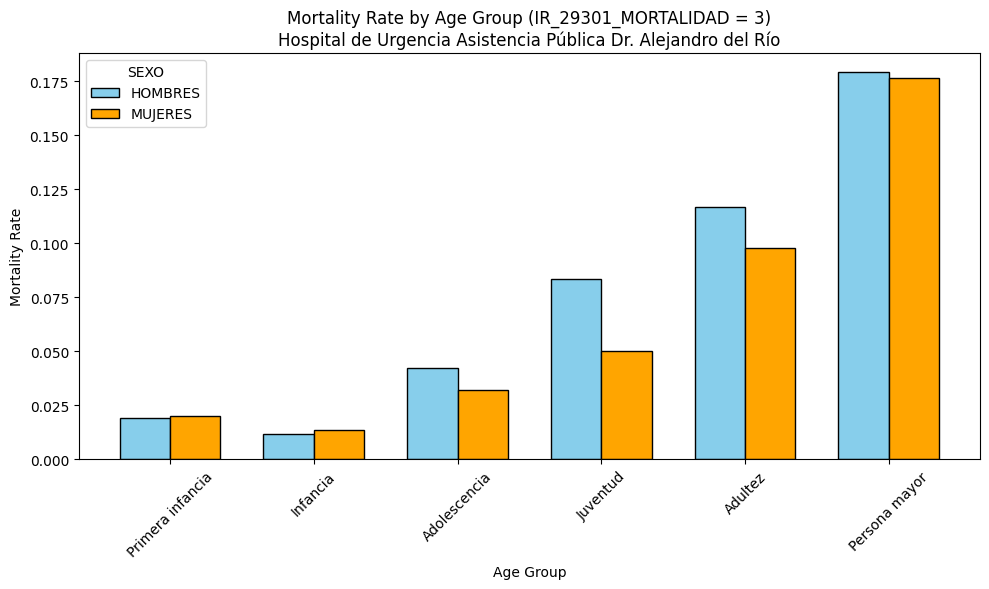

In [21]:
# Filter the results for IR_29301_MORTALIDAD == 3
hombres_mortalidad_3 = result_hombres[3]
mujeres_mortalidad_3 = result_mujeres[3]

# Create a grouped bar chart for the filtered data
x = np.arange(len(hombres_mortalidad_3.index))  # Numeric positions for age groups
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Plot data for HOMBRES
ax.bar(x - width / 2, hombres_mortalidad_3, width, label="HOMBRES", color="skyblue", edgecolor="black")

# Plot data for MUJERES
ax.bar(x + width / 2, mujeres_mortalidad_3, width, label="MUJERES", color="orange", edgecolor="black")

# Add labels, title, and legend
ax.set_title("Mortality Rate by Age Group (IR_29301_MORTALIDAD = 3)\nHospital de Urgencia Asistencia Pública Dr. Alejandro del Río")
ax.set_xlabel("Age Group")
ax.set_ylabel("Mortality Rate")
ax.legend(title="SEXO")
ax.set_xticks(x)
ax.set_xticklabels(hombres_mortalidad_3.index, rotation=45)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [22]:
# Filter the DataFrame for the specific hospital
hospital_df = grd_f[grd_f["NOMBRE_HOSPITAL"] == " Hospital de Urgencia Asistencia Pública Dr. Alejandro del Río"]

# Filter for SEXO = HOMBRE
hombres_df2 = hospital_df[hospital_df["SEXO"] == "HOMBRE"]
grouped_hombres2 = hombres_df2.groupby(["AGE_GROUP", "IR_29301_MORTALIDAD"])["TIPO_ALTA"]
result_hombres2 = (grouped_hombres2.sum() / grouped_hombres.count()).unstack()

# Filter for SEXO = MUJER
mujeres_df2 = hospital_df[hospital_df["SEXO"] == "MUJER"]
grouped_mujeres2 = mujeres_df2.groupby(["AGE_GROUP", "IR_29301_MORTALIDAD"])["TIPO_ALTA"]
result_mujeres2 = (grouped_mujeres2.sum() / grouped_mujeres.count()).unstack()

# Print the results
print("Mortality Rate for HOMBRES:")
print(result_hombres2)

print("\nMortality Rate for MUJERES:")
print(result_mujeres2)

Mortality Rate for HOMBRES:
IR_29301_MORTALIDAD  0.0       1.0       2.0       3.0
AGE_GROUP                                             
Primera infancia     0.0  0.000000  0.000000  0.000000
Infancia             0.0  0.000000  0.000000  0.000000
Adolescencia         0.0  0.000000  0.000000  0.000842
Juventud             0.0  0.000000  0.000741  0.003947
Adultez              0.0  0.000070  0.000448  0.005278
Persona mayor        0.0  0.000288  0.000299  0.004268

Mortality Rate for MUJERES:
IR_29301_MORTALIDAD  0.0       1.0       2.0       3.0
AGE_GROUP                                             
Primera infancia     0.0  0.000000  0.000000  0.000082
Infancia             0.0  0.000000  0.000000  0.000000
Adolescencia         0.0  0.000000  0.000000  0.000000
Juventud             0.0  0.000000  0.000260  0.001258
Adultez              0.0  0.000028  0.000278  0.002383
Persona mayor        0.0  0.000113  0.000497  0.004935


/var/folders/hw/8tjnzmw52vbctc3wdkptw00r0000gn/T/ipykernel_13208/2704564065.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_hombres2 = hombres_df2.groupby(["AGE_GROUP", "IR_29301_MORTALIDAD"])["TIPO_ALTA"]
/var/folders/hw/8tjnzmw52vbctc3wdkptw00r0000gn/T/ipykernel_13208/2704564065.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_mujeres2 = mujeres_df2.groupby(["AGE_GROUP", "IR_29301_MORTALIDAD"])["TIPO_ALTA"]


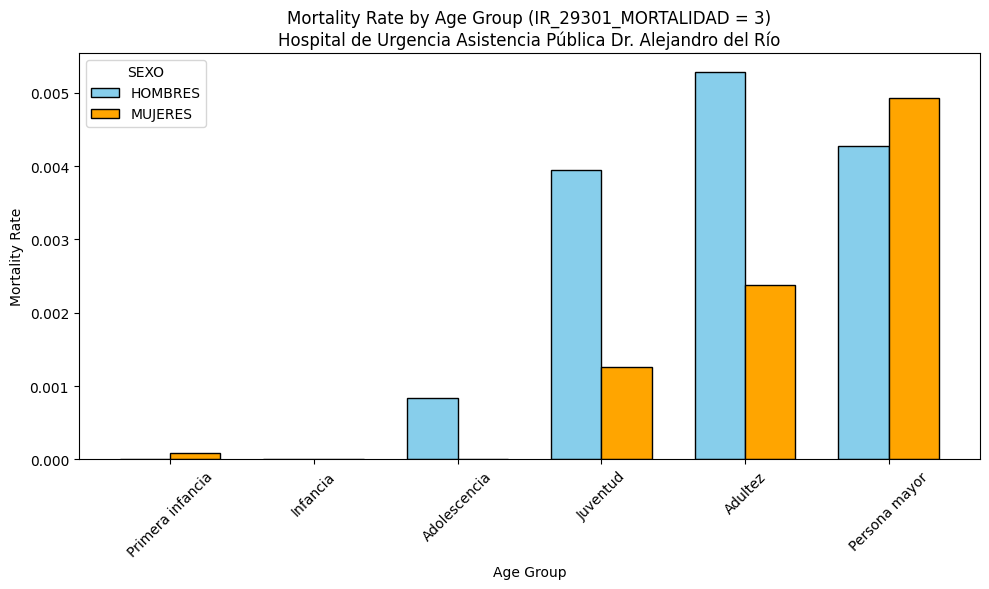

In [23]:
# Filter the results for IR_29301_MORTALIDAD == 3
hombres_mortalidad2 = result_hombres2[3]
mujeres_mortalidad2 = result_mujeres2[3]

# Create a grouped bar chart for the filtered data
x = np.arange(len(hombres_mortalidad_3.index))  # Numeric positions for age groups
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Plot data for HOMBRES
ax.bar(x - width / 2, hombres_mortalidad2, width, label="HOMBRES", color="skyblue", edgecolor="black")

# Plot data for MUJERES
ax.bar(x + width / 2, mujeres_mortalidad2, width, label="MUJERES", color="orange", edgecolor="black")

# Add labels, title, and legend
ax.set_title("Mortality Rate by Age Group (IR_29301_MORTALIDAD = 3)\nHospital de Urgencia Asistencia Pública Dr. Alejandro del Río")
ax.set_xlabel("Age Group")
ax.set_ylabel("Mortality Rate")
ax.legend(title="SEXO")
ax.set_xticks(x)
ax.set_xticklabels(hombres_mortalidad2.index, rotation=45)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()